In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [6.0, 6.0] 
plt.rcParams['figure.dpi'] = 200 
plt.rcParams.update({'font.size': 11})

In [3]:
df = pd.read_csv('cacao_ready.csv')

In [4]:
df_best = df.loc[df['Rating'] >=4.0]

In [5]:
df_worst = df.loc[df['Rating'] <=2.0]

In [6]:
print(os.getcwd())

C:\Users\matri\Desktop\python_course\Cacao


In [7]:
#path = "../vizs"

#try:
#    os.mkdir(path)
#except OSError:
#    pass

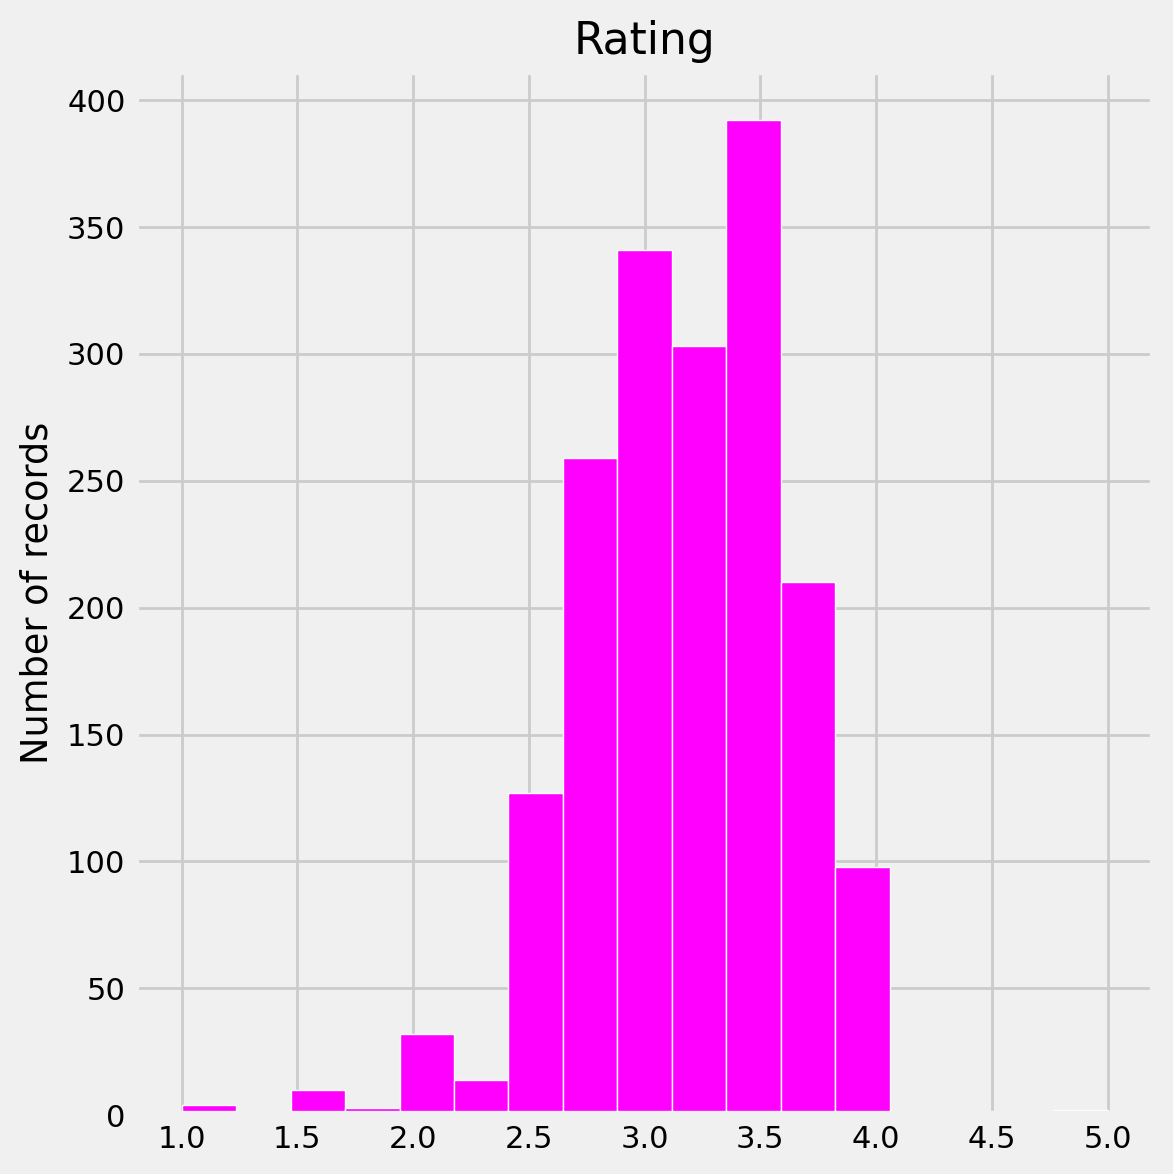

In [8]:

plt.hist(x=df['Rating'], color='magenta', bins=17, edgecolor='white')
plt.title('Rating')
plt.ylabel('Number of records');
plt.tight_layout();

plt.savefig('rating_counts.png', dpi=200);

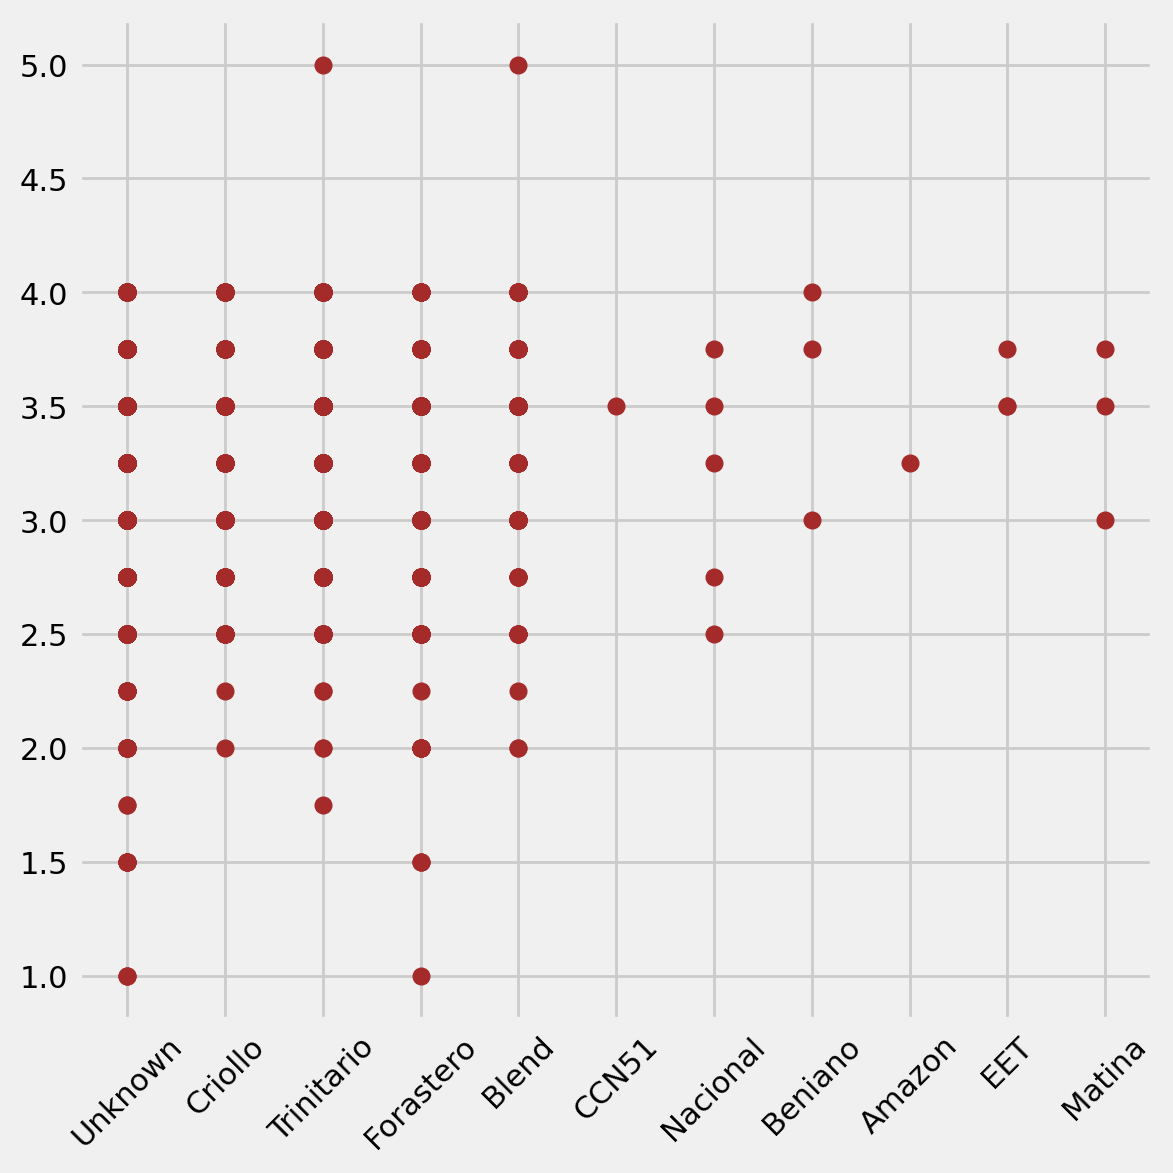

In [9]:
plt.scatter(x=df['Bean Type Group'], y=df['Rating'], marker='o', color='brown')
plt.xticks(rotation=45);
plt.tight_layout();
plt.savefig('Bean_type_rating.png', dpi=800);
# plt.show()

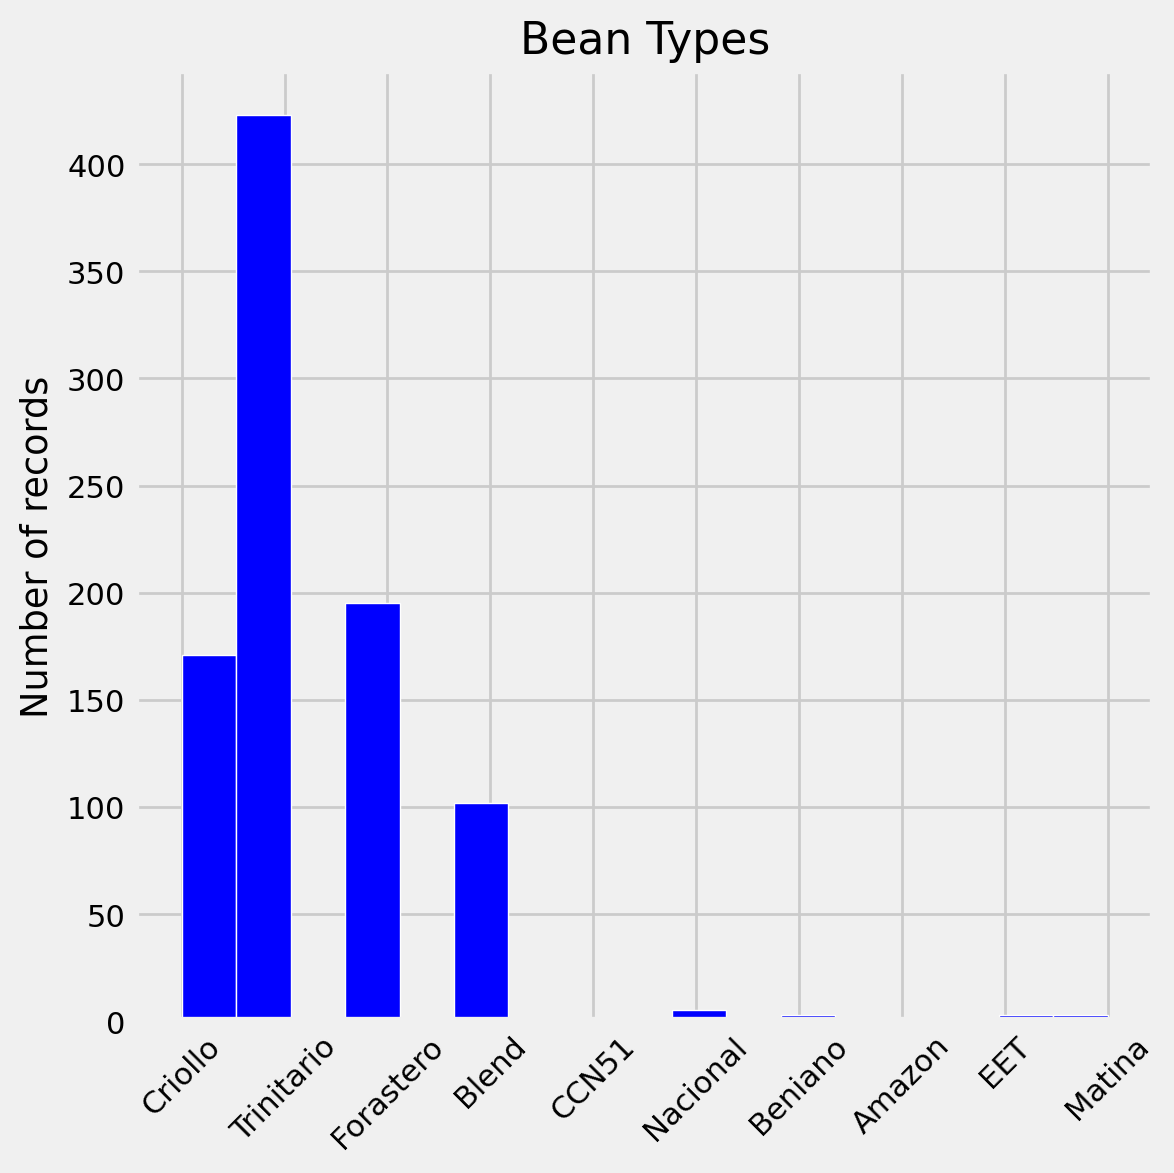

In [10]:
#remove type unknown to better showcase other types

#df_known_type = df[df.['Bean Type Group'] != 'Unknown']
df_known_type = df.drop(df.loc[df['Bean Type Group']=='Unknown'].index, inplace=True)

plt.hist(x=df['Bean Type Group'], color='blue', bins=17, edgecolor='white')
plt.title('Bean Types')
plt.ylabel('Number of records')
plt.xticks(rotation=45);
plt.tight_layout();

plt.savefig('Bean_type_records.png', dpi=900)

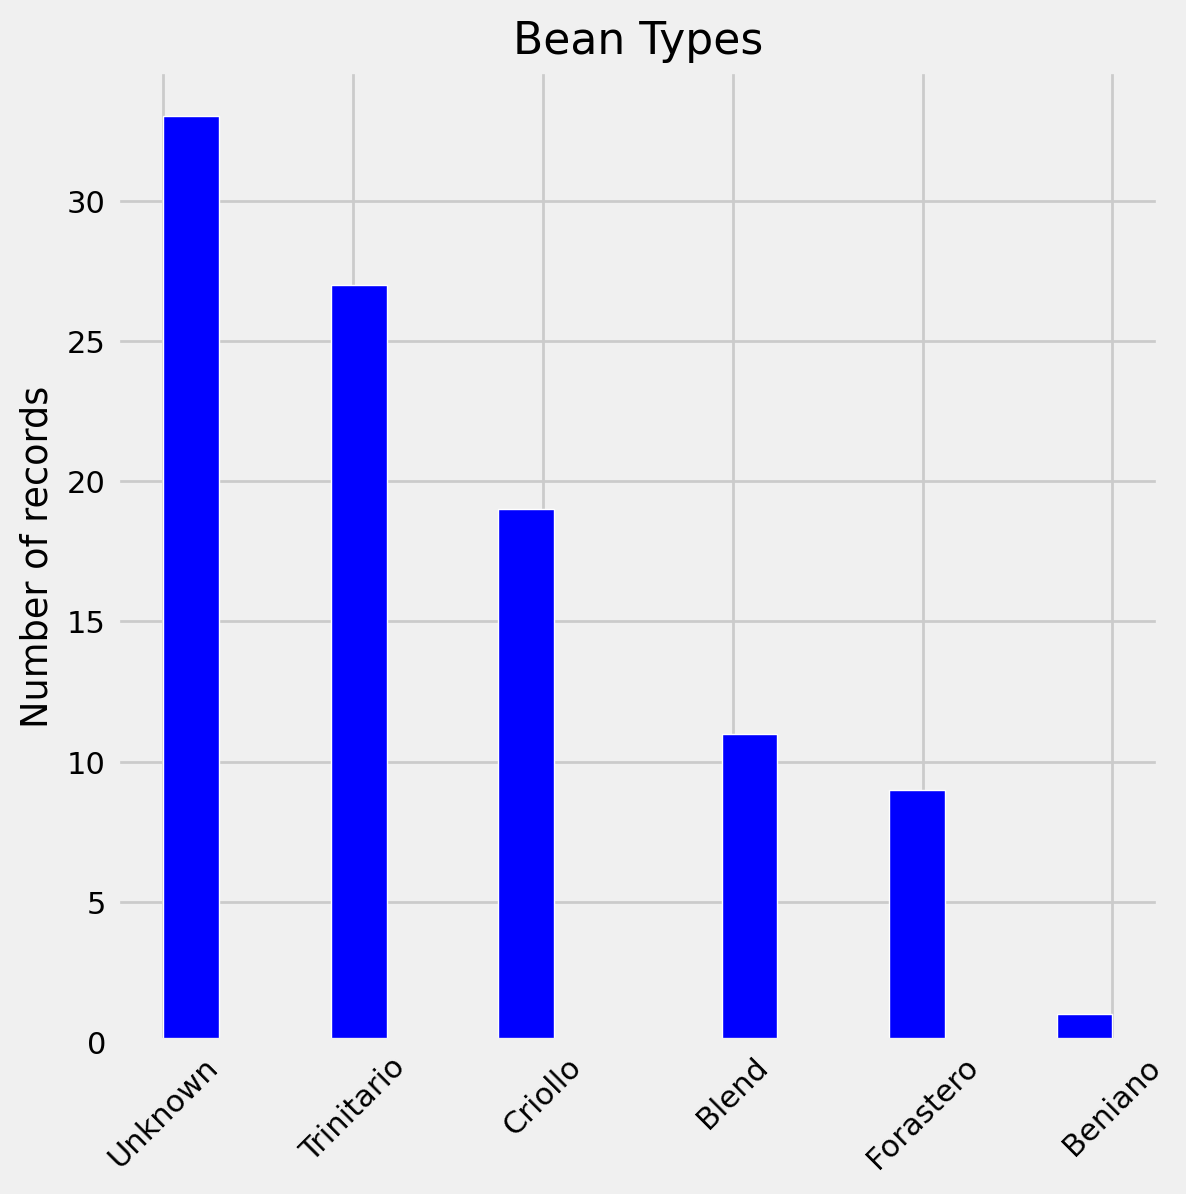

In [11]:
plt.hist(x=df_best['Bean Type Group'], color='blue', bins=17, edgecolor='white')
plt.title('Bean Types')
plt.ylabel('Number of records')
plt.xticks(rotation=45)
plt.show()

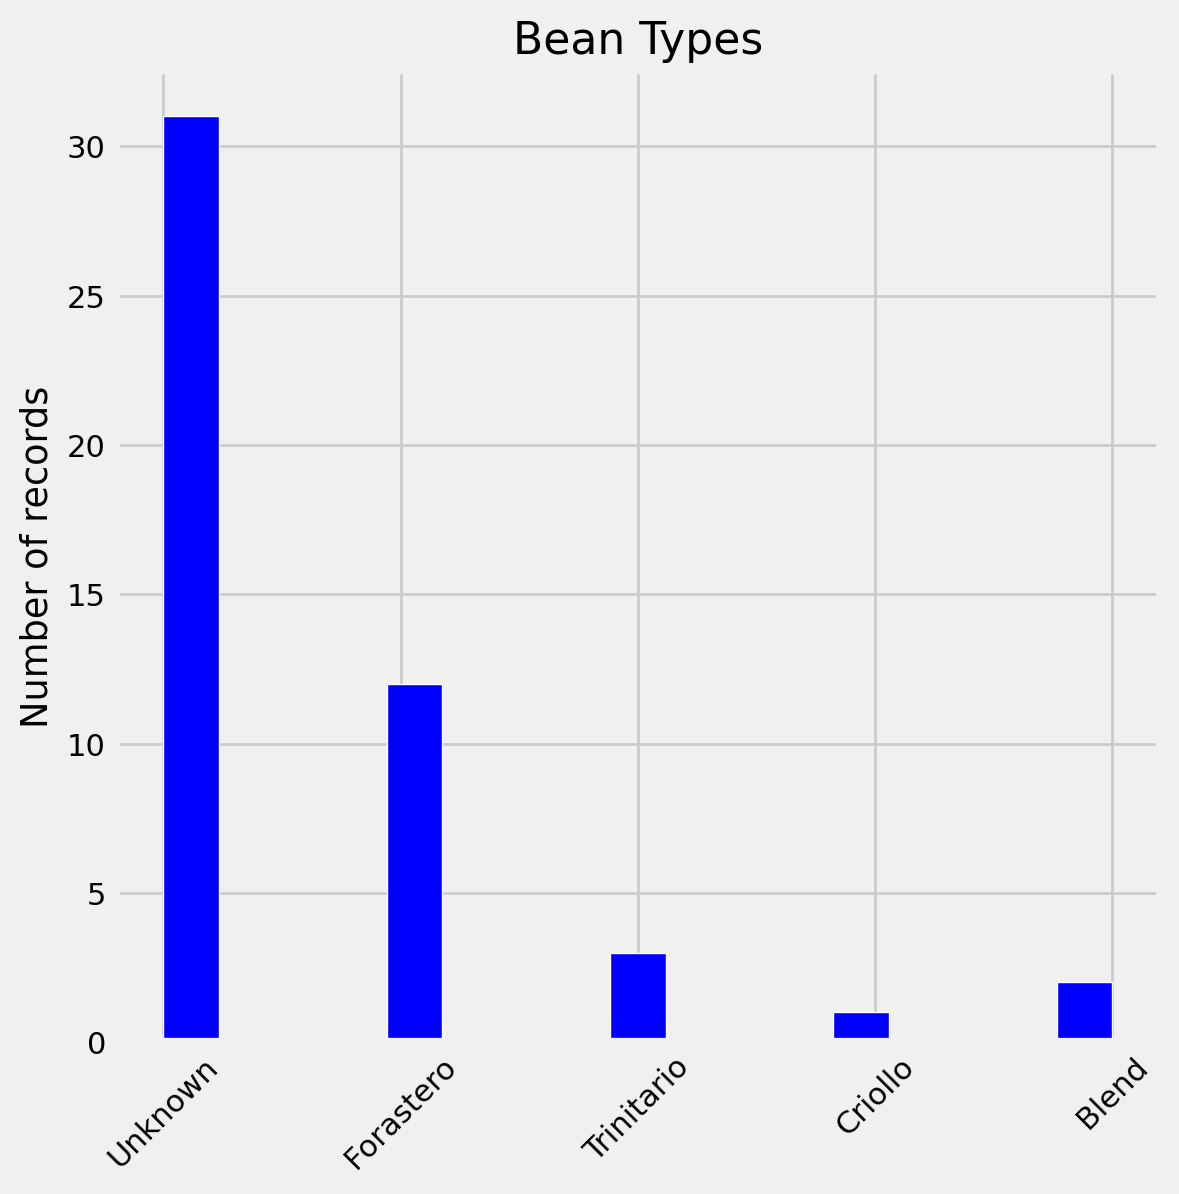

In [12]:
plt.hist(x=df_worst['Bean Type Group'], color='blue', bins=17, edgecolor='white')
plt.title('Bean Types')
plt.ylabel('Number of records')
plt.xticks(rotation=45)
plt.show()

In [13]:
# as there aren't many records for bean types other than the main 4, 
# it does not make sense to analyse the whole set for dependencies, set containing record of best ones could be useful

In [14]:
stats_by_year_general = df.pivot_table(
    index='Review Date',
    values=['Cacao %', 'Rating'],
    aggfunc='mean'
)

stats_by_year_general

Cacao %    Rating
Review Date                     
2006         70.224138  3.284483
2007         72.196721  3.299180
2008         72.548387  3.048387
2009         70.563291  3.132911
2010         71.537736  3.202830
2011         71.395062  3.268519
2012         71.913978  3.212366
2013         73.683544  3.275316
2014         72.044715  3.235772
2015         71.945736  3.277132
2016         71.788235  3.255882
2017         70.000000  3.500000

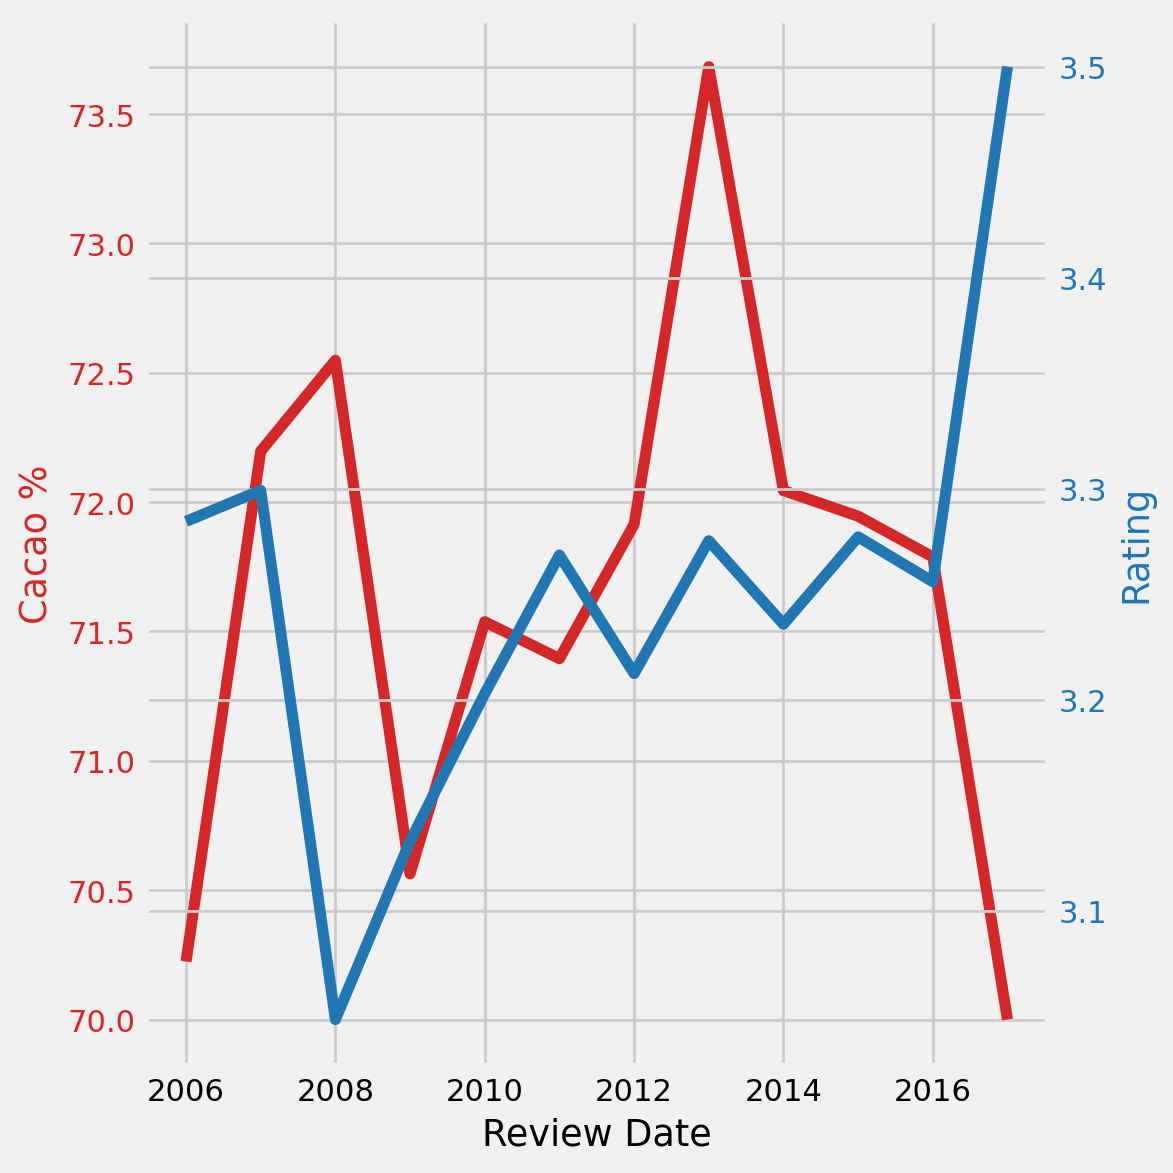

In [15]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Review Date')
ax1.set_ylabel('Cacao %', color=color)
ax1.plot(stats_by_year_general.index, stats_by_year_general['Cacao %'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Rating', color=color)  
ax2.plot(stats_by_year_general.index, stats_by_year_general['Rating'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout();

plt.savefig('Average_perc_and_rates', dpi=900)




In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

%matplotlib inline

In [17]:
sns.set_palette('colorblind')

%config InlineBackend.figure_format = 'retina'

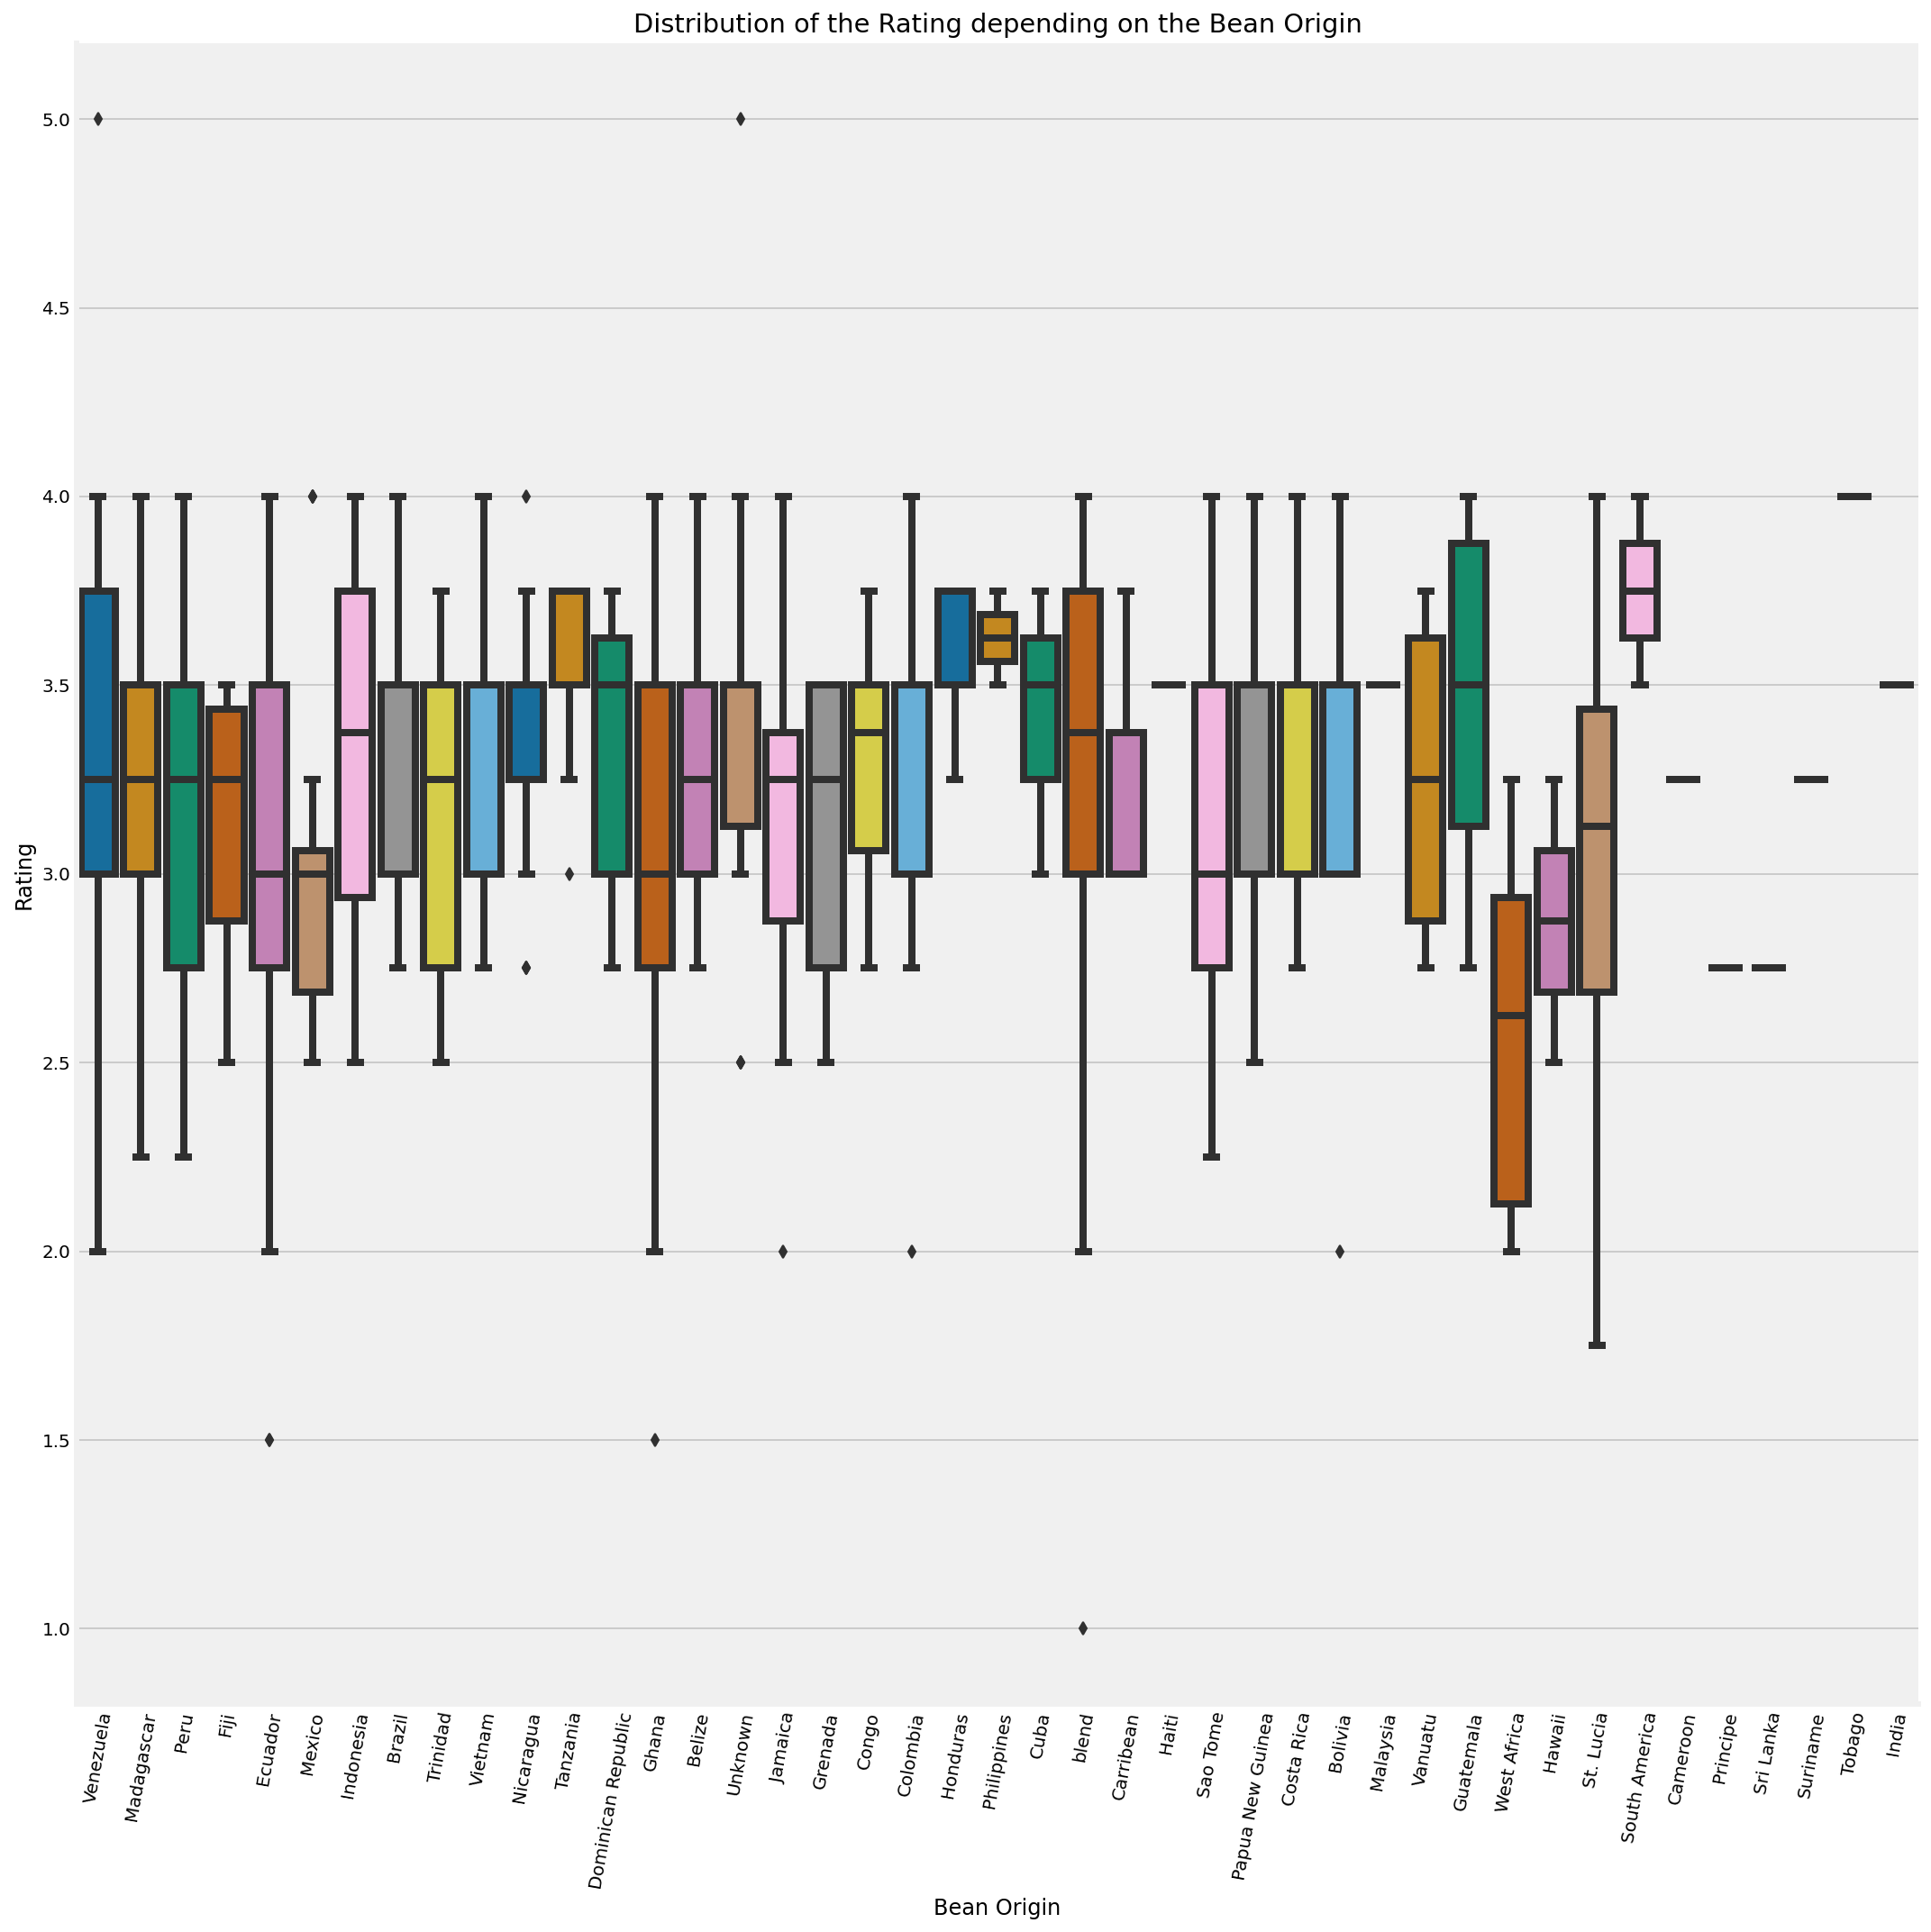

In [18]:
sns.catplot(x='Bean Origin', 
            y='Rating', 
            data=df, 
            kind='box',
             height=15, aspect=1, orient=None, color=None, palette='colorblind',)

# information about the chart
plt.xticks(rotation=80)
plt.xlabel("Bean Origin")
plt.ylabel("Rating")
plt.title("Distribution of the Rating depending on the Bean Origin")
plt.rcParams['figure.dpi'] = 500
plt.tight_layout();
plt.savefig('origin_rate', dpi=800)

#plt.show()

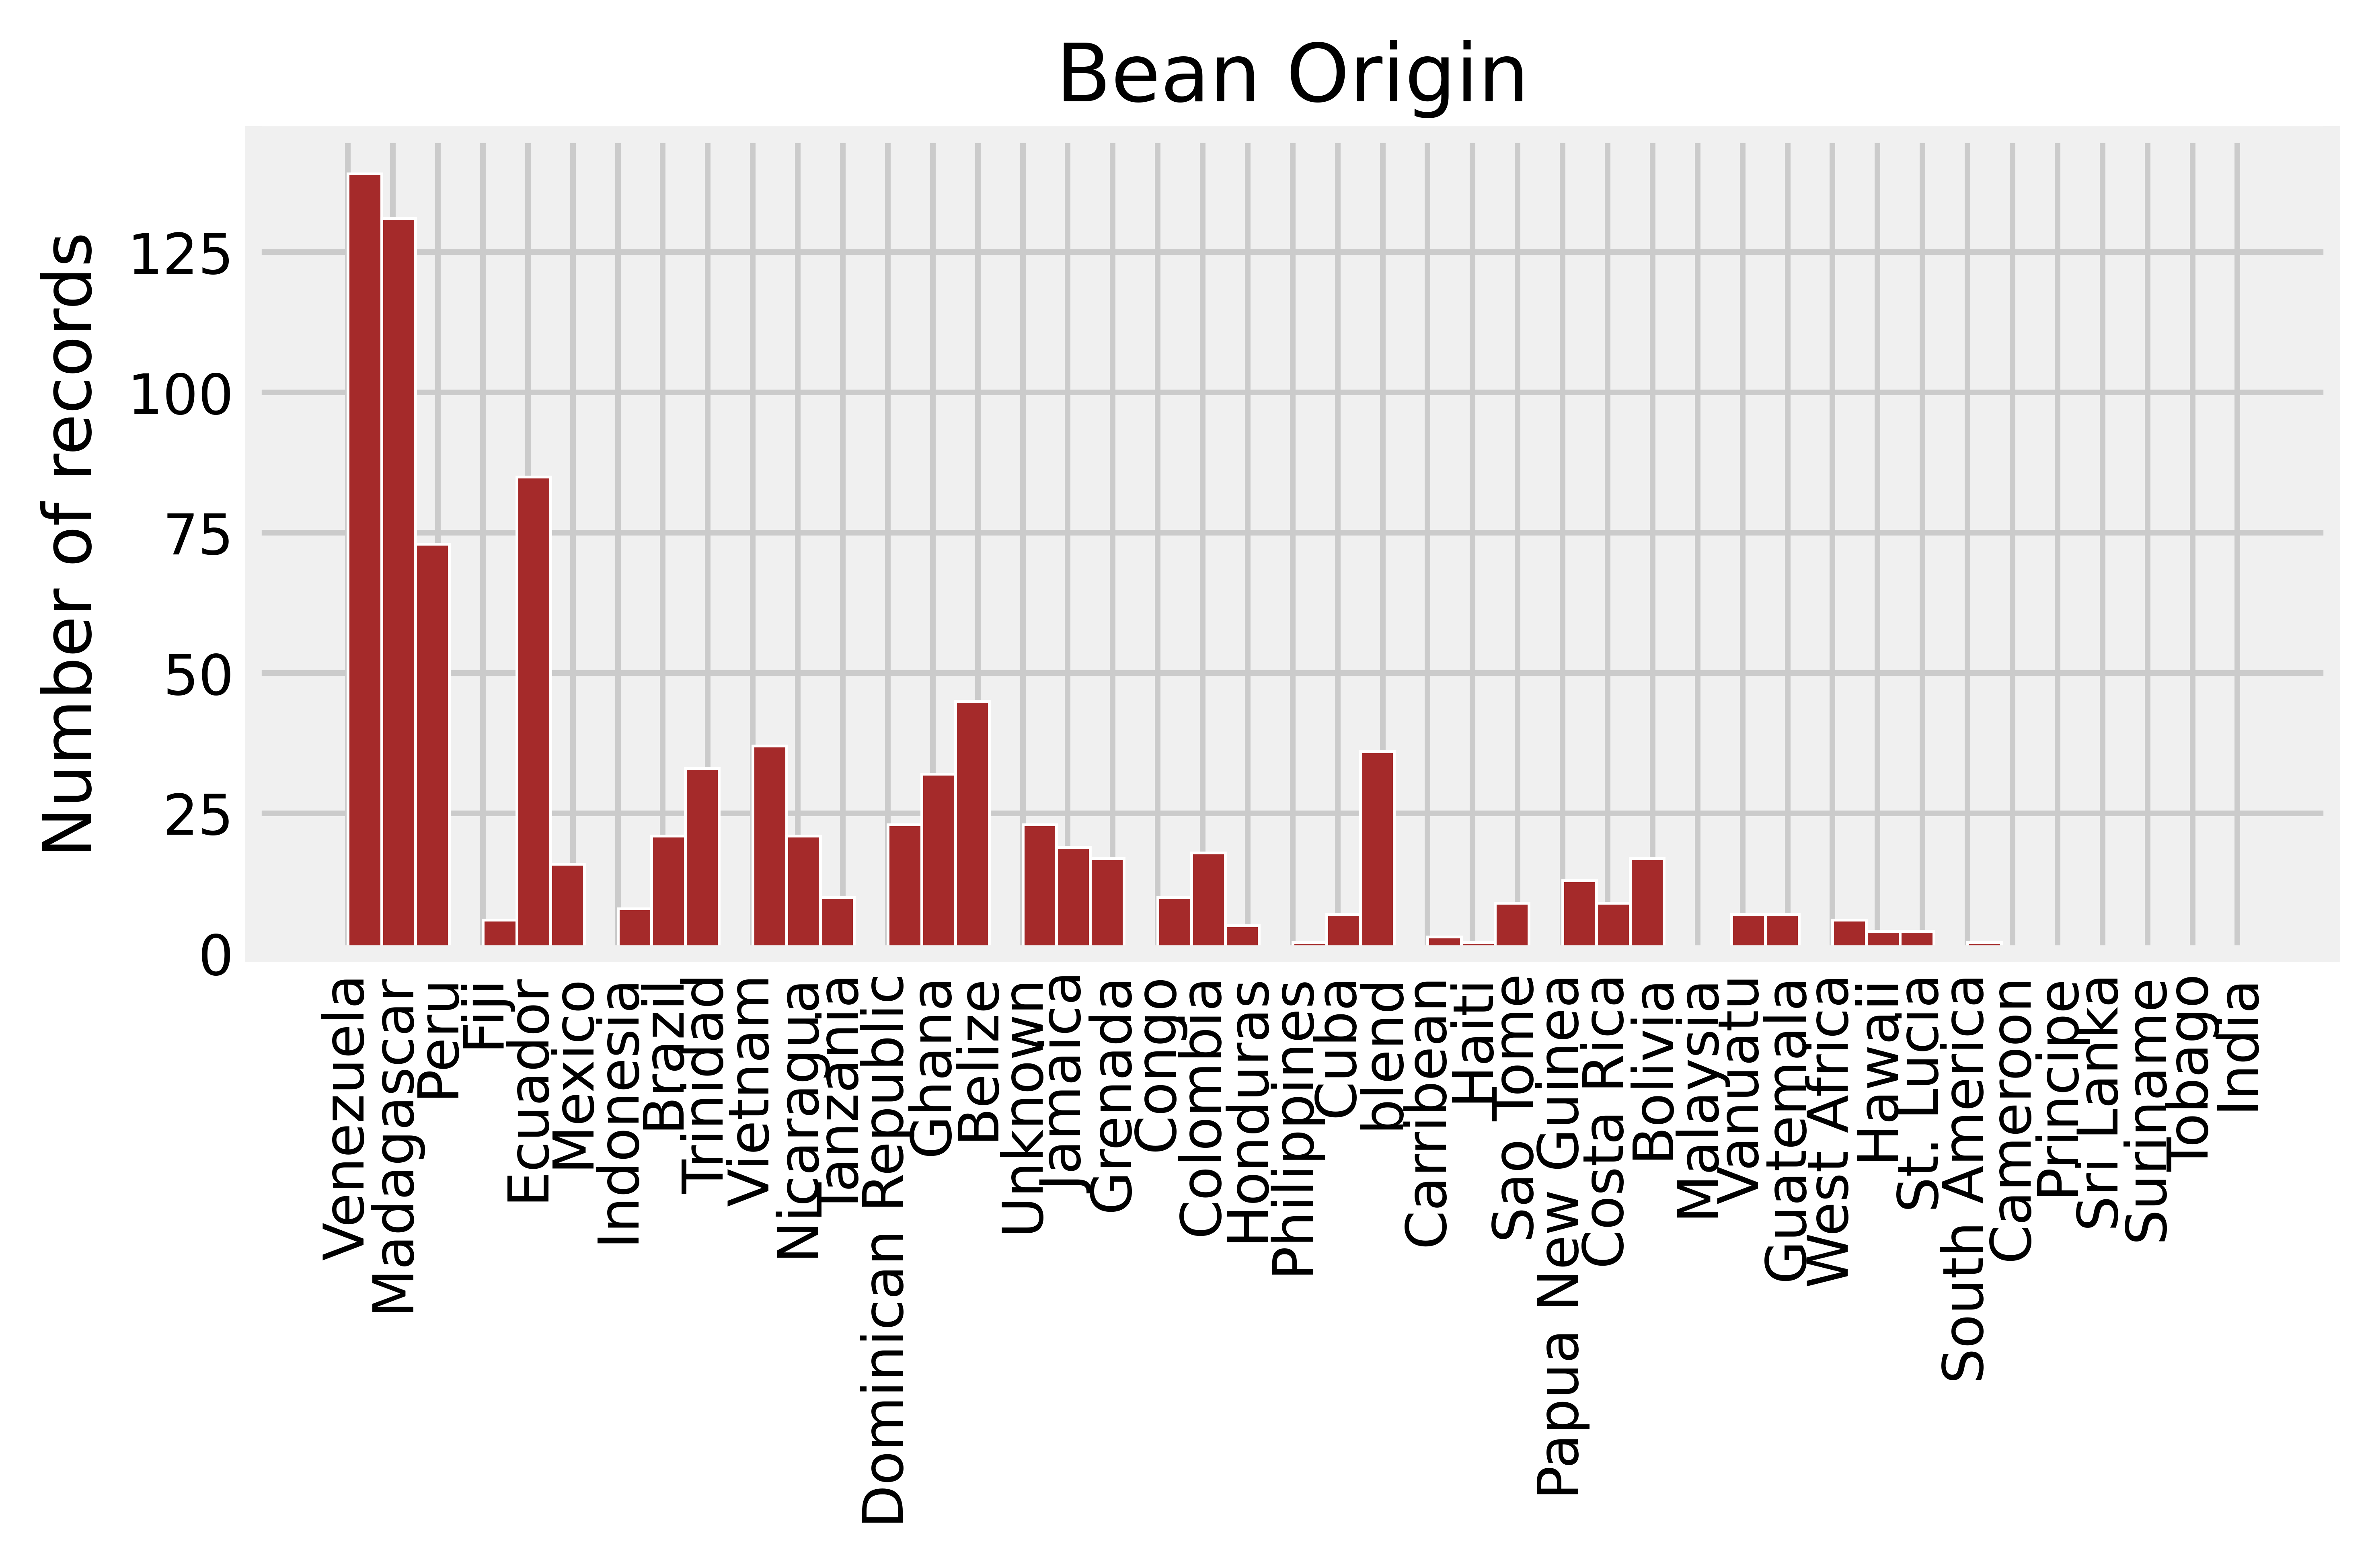

In [19]:
plt.hist(x=df['Bean Origin'], color='brown', bins = 56,  edgecolor='white')
plt.title('Bean Origin')
plt.ylabel('Number of records')
plt.xticks(rotation=90)
plt.tight_layout();

plt.savefig('origin_records', dpi=200)

In [20]:
# are any of the countries with low count significant in the worst or best groups?


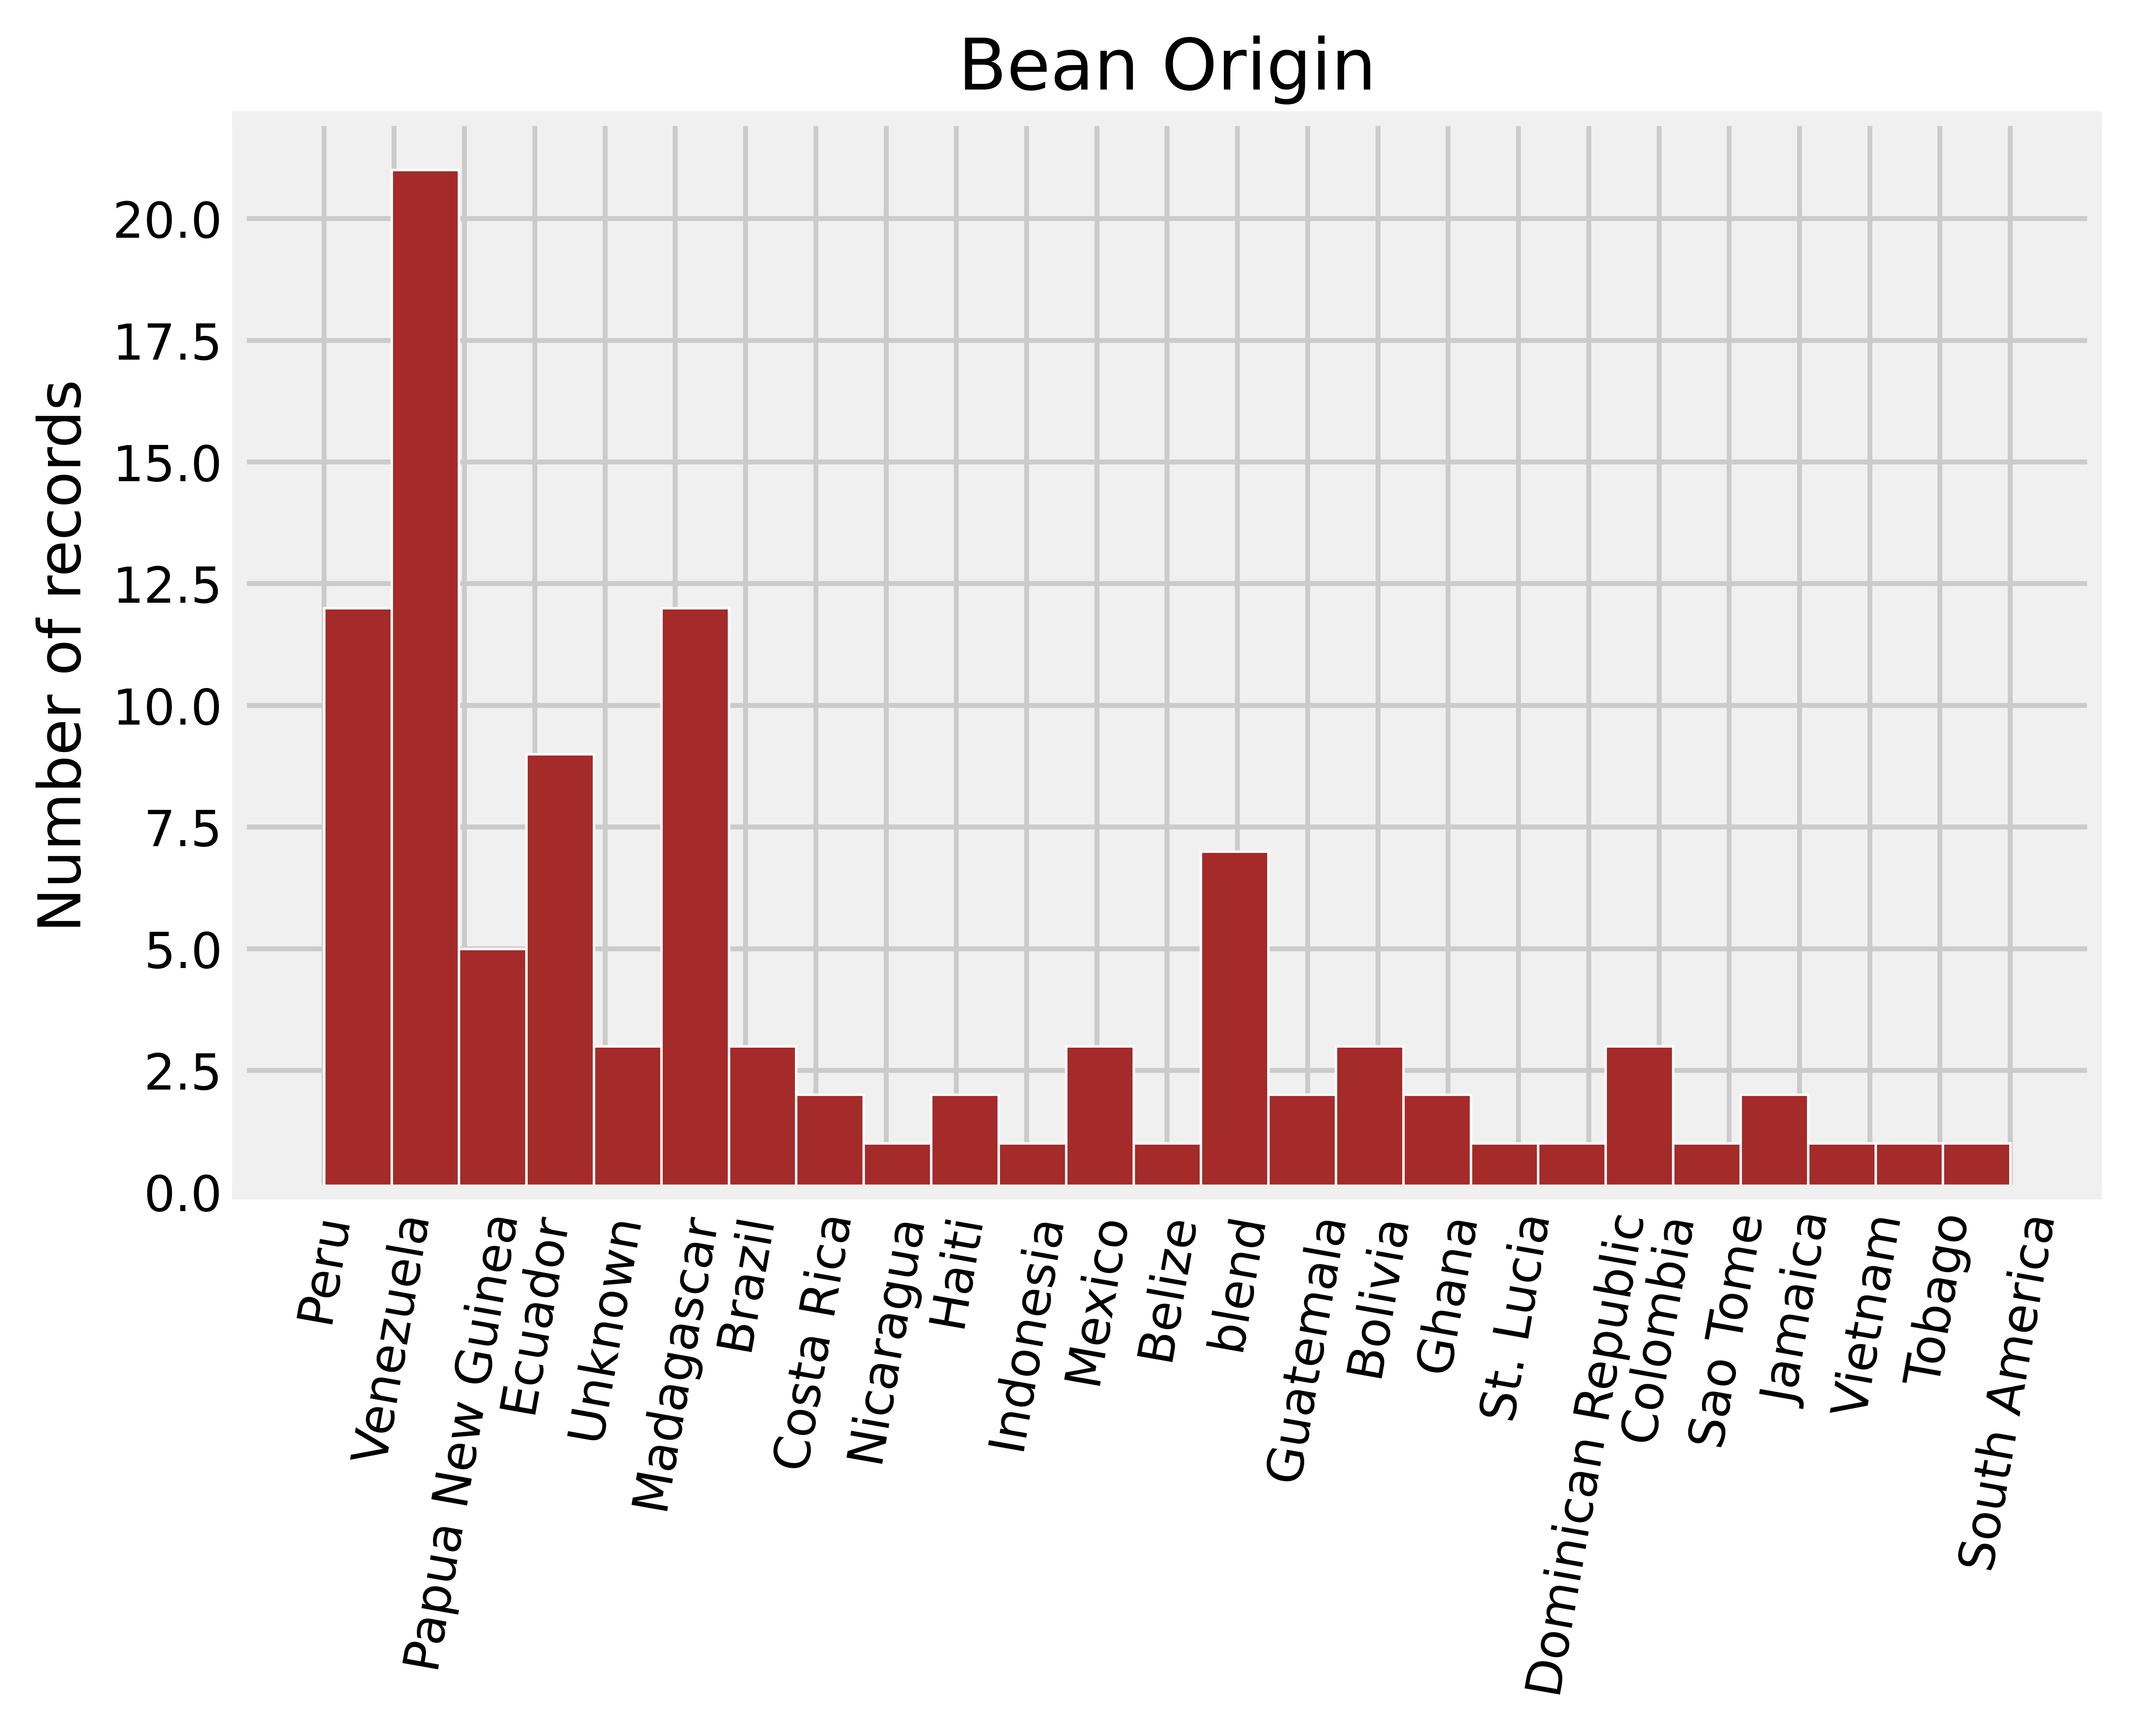

In [21]:
plt.hist(x=df_best['Bean Origin'], color='brown', bins = 25, edgecolor='white')
plt.title('Bean Origin')
plt.ylabel('Number of records')
plt.xticks(rotation=80)
plt.show()

In [22]:
#count_origins = df.pivot_table(values="Bean Origin", index="Y", columns="Z", aggfunc=pd.Series.nunique)



In [23]:
from collections import Counter
count_origins = Counter( df['Bean Origin'] )

In [24]:
count_origins.most_common()

[('Venezuela', 139),
 ('Madagascar', 131),
 ('Ecuador', 85),
 ('Peru', 73),
 ('Belize', 45),
 ('Vietnam', 37),
 ('blend', 36),
 ('Trinidad', 33),
 ('Ghana', 32),
 ('Dominican Republic', 23),
 ('Unknown', 23),
 ('Brazil', 21),
 ('Nicaragua', 21),
 ('Jamaica', 19),
 ('Colombia', 18),
 ('Grenada', 17),
 ('Bolivia', 17),
 ('Mexico', 16),
 ('Papua New Guinea', 13),
 ('Tanzania', 10),
 ('Congo', 10),
 ('Sao Tome', 9),
 ('Costa Rica', 9),
 ('Indonesia', 8),
 ('Cuba', 7),
 ('Vanuatu', 7),
 ('Guatemala', 7),
 ('Fiji', 6),
 ('West Africa', 6),
 ('Honduras', 5),
 ('Hawaii', 4),
 ('St. Lucia', 4),
 ('Carribean', 3),
 ('Philippines', 2),
 ('Haiti', 2),
 ('South America', 2),
 ('Malaysia', 1),
 ('Cameroon', 1),
 ('Principe', 1),
 ('Sri Lanka', 1),
 ('Suriname', 1),
 ('Tobago', 1),
 ('India', 1)]

In [25]:
#For further analysis I am choosing only the top five origins, as further the drop is too big to reasonably compare data 

In [26]:
most_com_origins = count_origins.most_common(5)

In [27]:
def comm_occ_list(counter_list):
    comm_occ = []
    number = len(counter_list)
    i = 0
    while i < number:
        comm_occ.append(counter_list[i][0])
        i+=1
    return comm_occ
    
        

In [28]:
most_comm_origins_list = comm_occ_list(most_com_origins)

In [29]:
df_origins = df[df['Bean Origin'].isin(most_comm_origins_list)]

In [30]:
df_origins

Maker                               Name  REF#  Review Date  \
5          A. Morin                           Carenero  1315         2014   
7          A. Morin                       Sur del Lago  1315         2014   
8          A. Morin                     Puerto Cabello  1319         2014   
11         A. Morin                         Madagascar  1011         2013   
17         A. Morin                              Chuao  1015         2013   
...             ...                                ...   ...          ...   
1767  Zart Pralinen                 Millot P., Ambanja  1820         2016   
1768  Zart Pralinen                            UNOCACE  1824         2016   
1781         Zotter  Satipo Pangoa region, 16hr conche   875         2012   
1782         Zotter  Satipo Pangoa region, 20hr conche   875         2012   
1784         Zotter                             El Oro   879         2012   

      Cacao %  Made in  Rating             Bean Type Bean Origin  \
5        70.0   France    2.75               Criollo   Venezuela   
7        70.0   France    3.50               Criollo   Venezuela   
8        70.0   France    3.75               Criollo   Venezuela   
11       70.0   France    3.00               Criollo  Madagascar   
17       70.0   France    4.00            Trinitario   Venezuela   
...       ...      ...     ...                   ...         ...   
1767     70.0  Austria    3.50   Criollo, Trinitario  Madagascar   
1768     70.0  Austria    2.75     Nacional (Arriba)     Ecuador   
1781     70.0  Austria    3.00      Criollo (Amarru)        Peru   
1782     70.0  Austria    3.50      Criollo (Amarru)        Peru   
1784     75.0  Austria    3.00  Forastero (Nacional)     Ecuador   

     Bean Type Group  
5            Criollo  
7            Criollo  
8            Criollo  
11           Criollo  
17        Trinitario  
...              ...  
1767           Blend  
1768        Nacional  
1781         Criollo  
1782         Criollo  
1784       Forastero  

[473 rows x 10 columns]

In [31]:
sns.catplot(x='Bean Origin', 
            y='Rating', 
            data=df_origins, 
            kind='box',
             height=15, aspect=1, orient=None, color=None, palette='colorblind',)

# information about the chart
plt.xticks(rotation=80)
plt.xlabel("Bean Origin")
plt.ylabel("Rating")
plt.title("Distribution of the Rating depending on the Bean Origin")
plt.rcParams['figure.dpi'] = 500
plt.tight_layout();
plt.savefig('comm_origin_rate', dpi=200)
#plt.show()

In [32]:
stats_by_year = df_origins.pivot_table(
    index='Review Date',
    values=['Cacao %', 'Rating'],
    aggfunc='mean'
)

stats_by_year

Cacao %    Rating
Review Date                     
2006         70.090909  3.420455
2007         71.842105  3.335526
2008         71.846154  3.032051
2009         71.079545  3.085227
2010         71.640000  3.060000
2011         72.722222  3.368056
2012         72.842105  3.138158
2013         74.340426  3.250000
2014         72.178082  3.267123
2015         72.071429  3.275000
2016         72.125000  3.150000
2017         70.000000  3.500000

In [56]:
from bokeh.plotting import figure, output_file, show, save

In [57]:

p2 = figure(
    title='Average Cacao % for all and most common bean origins',
    plot_height=500,
    plot_width=600,
    y_axis_label='Cacao %'
)

# lines are great for showing trends
p2.line(x=stats_by_year.index, y=stats_by_year_general['Cacao %'], line_width=2)

# and we can combine them in the sample figure with other markers, change the size, and add color to the marker
p2.line(x=stats_by_year.index, y=stats_by_year['Cacao %'], line_width=4)
plt.tight_layout();
#plt.savefig('percentage_comparison', dpi=400)
output_file('percentage_comparison.html');
save(p2)

'C:\\Users\\matri\\Desktop\\python_course\\Cacao\\percentage_comparison.html'

<Figure size 3000x2000 with 0 Axes>

In [35]:
df['Made in'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Germany', 'Belgium', 'Venezuela', 'Japan',
       'New Zealand', 'Costa Rica', 'Colombia', 'South Korea',
       'Amsterdam', 'Scotland', 'Sao Tome', 'Argentina', 'Guatemala',
       'South Africa', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'Czech Republic', 'Finland', 'Madagascar',
       'Philippines', 'Poland', 'Sweden', 'Lithuania', 'Nicaragua',
       'Chile', 'Ghana', 'Iceland', 'Eucador', 'Hungary', 'Suriname',
       'Ireland', 'Austria'], dtype=object)

In [36]:
sns.catplot(x='Made in', 
            y='Rating', 
            data=df, 
            kind='box',
             height=15, aspect=1, orient=None, color=None, palette='colorblind',)

# information about the chart
plt.xticks(rotation=80)
plt.xlabel("Made in")
plt.ylabel("Rating")
plt.title("Distribution of the Rating depending on the Country if production")
plt.rcParams['figure.dpi'] = 500


#plt.show()

In [37]:
count_madein = Counter( df['Made in'] )

In [38]:
most_com_madein = count_madein.most_common(5)

In [39]:
most_comm_madein_list = comm_occ_list(most_com_madein)

In [40]:
df_madein = df[df['Made in'].isin(most_comm_madein_list)]

In [41]:
sns.catplot(x='Made in', 
            y='Rating', 
            data=df_madein, 
            kind='box',
             height=15, aspect=1, orient=None, color=None, palette='colorblind',)

# information about the chart
plt.xticks(rotation=80)
plt.xlabel("Made in")
plt.ylabel("Rating")
plt.title("Distribution of the Rating depending on the Country of production")
plt.rcParams['figure.dpi'] = 500
plt.tight_layout();
plt.savefig('comm_madein_rate', dpi=800)

#plt.show()

In [42]:
count_origins_best = Counter( df_best['Bean Origin'] )

In [43]:
#count_origins_best.most_common()

In [44]:
# I am choosing the top 4 as the lowest one is about 25% of the highest count and after that the counts are similiar

In [45]:
count_origins_best.most_common(6)

[('Venezuela', 21),
 ('Peru', 12),
 ('Madagascar', 12),
 ('Ecuador', 9),
 ('blend', 7),
 ('Papua New Guinea', 5)]

In [46]:
stats_by_percentage = df.pivot_table(
    index='Cacao %',
    values=['Rating'],
    aggfunc=['mean', 'min', 'max']
)

stats_by_percentage 

mean    min    max
           Rating Rating Rating
Cacao %                        
50.0     3.750000   3.75   3.75
53.0     2.000000   2.00   2.00
55.0     2.906250   2.50   3.50
57.0     2.750000   2.75   2.75
58.0     3.200000   2.50   3.50
60.0     3.083333   2.50   4.00
60.5     2.750000   2.75   2.75
61.0     3.000000   2.50   3.50
62.0     2.937500   2.00   3.50
63.0     3.450000   2.75   4.00
64.0     3.218750   2.50   4.00
65.0     3.250000   2.50   4.00
66.0     3.333333   2.50   4.00
67.0     3.264706   1.50   3.75
68.0     3.294643   2.00   4.00
69.0     3.562500   3.00   4.00
70.0     3.364650   2.00   5.00
71.0     3.000000   2.00   3.50
72.0     3.213235   2.25   4.00
72.5     2.750000   2.50   3.00
73.0     3.291667   2.00   4.00
73.5     3.125000   2.50   3.75
74.0     3.340000   2.50   4.00
75.0     3.213115   2.00   4.00
76.0     3.083333   2.25   3.75
77.0     2.977273   2.00   3.75
78.0     3.307692   2.25   3.75
80.0     3.052632   2.00   4.00
81.0     3.062500   2.75   3.50
82.0     3.136364   2.50   3.75
83.0     3.000000   2.75   3.50
84.0     3.000000   3.00   3.00
85.0     3.053571   2.50   3.50
86.0     3.250000   3.25   3.25
88.0     3.083333   2.75   3.50
89.0     2.750000   2.75   2.75
90.0     2.750000   2.00   3.25
91.0     1.750000   1.50   2.00
100.0    2.194444   1.00   3.00

In [69]:
from bokeh.models import HoverTool, ColumnDataSource


In [70]:
#!conda install selenium geckodriver firefox -c conda-forge
#Installing selenium has been taking way too long,
#from bokeh.io import export_png

In [63]:
hover = HoverTool(
  tooltips=[
    ('Rating',   '@y'),
    ('Cacao %',  '@x' ), 

  ],
  #formatters={
   # 'Rating' : '@y', 
 #   'Cacao %' : '@x',
                 
#  },
  mode='vline'
)


p3 = figure(
    title='Ratings depending on Cacao %',
    plot_height=900,
    plot_width=800,
    y_axis_label='Rating',
    tools=[hover, 'crosshair']
)

source = ColumnDataSource(df)

# lines are great for showing trends
p3.line(x=stats_by_percentage.index, y=stats_by_percentage['mean']['Rating'], line_width=4, color = 'steelblue')

# and we can combine them in the sample figure with other markers, change the size, and add color to the marker
p3.line(x=stats_by_percentage.index, y=stats_by_percentage['min']['Rating'], line_width=2, color = 'firebrick')

p3.line(x=stats_by_percentage.index, y=stats_by_percentage['max']['Rating'], line_width=2, color = 'lawngreen')

plt.tight_layout();
#plt.savefig('ratings_and_percentage', dpi=800)
output_file('ratings_and_percentage.html');
#export_png(p3, filename = 'ratings_and_percentage' )
save(p3)
#show(p3)

RuntimeError: To use bokeh.io image export functions you need selenium ('conda install selenium' or 'pip install selenium')

<Figure size 3000x2000 with 0 Axes>

In [60]:
#hover = HoverTool(tooltips=None, mode='hline')

p4 = figure(
title='Cacao % through the years',
plot_height=900,
plot_width=900,
#tools=[hover, 'crosshair']
)

p4.cross(df['Review Date'], df['Cacao %'], size = 10)
plt.tight_layout();
#plt.savefig('percentage_in_time', dpi=800)
output_file('percentage_in_time.html');
save(p4)
#show(p4)

'C:\\Users\\matri\\Desktop\\python_course\\Cacao\\percentage_in_time.svg'

<Figure size 3000x2000 with 0 Axes>

In [ ]:
count_origins_worst = Counter( df_worst['Bean Origin'] )

In [ ]:
#count_origins_worst.most_common()

In [ ]:
#similarly, only choosing 4 top ones

In [ ]:
count_origins_worst.most_common()

In [ ]:
df_common_origins = df.loc[df['Bean Origin'] in any(count_origins.most_common(5))]

In [ ]:
df_best['Maker'].unique()